***
#### About this document
This is an assignment for Data Science for Spatial Systems (CASA0006)

**Code & Data are available [here](https://github.com/phily5051/CASA0006.git)**<br>
***

# What are the crucial factors for business air-traveler's satisfaction?

## 1. Introduction

This notebook aims to explorer 

Are there any ethical issue with the data as this is a survey

The Airline industry suffered a huge setback after the pandemic, and as per ICAO, the airline industry suffered a 371 bn loss in 2020, and 329 bn with the reduced seat capacity. Hence, to revive the industry in the light of this recession, it is absolutely a necessity to understand the customer pain points, and improve their satisfaction in the services provided.

[Data](https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction)

### Packages

In [1]:
import time
start_time = time.time()


In [2]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import numpy as np
import pandas as pd
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)

# pipeline
from sklearn.pipeline import Pipeline

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score

# preprocessors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)




# model algorithams
from sklearn.ensemble import (RandomForestRegressor,
                              RandomForestClassifier,
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Notebook settings
random_state = 42 # for reproducability
np.random.seed(random_state) # setting numpy random seed, as that is used for sklearn operations

### Data Import

In [3]:
# read in the data
data = pd.read_csv("https://raw.githubusercontent.com/phily5051/CASA0006/main/airline_passenger_satisfaction.csv")

In [4]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0000,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0000,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0000,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0000,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0000,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
data.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0000,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0000,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0000,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0000,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0000,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [6]:
# data shape
row, col = data.shape
print(f"There are {row} rows and {col} columns in the data")

There are 129880 rows and 24 columns in the data


## Exploratory Data Analysis

### Description of each attribute
The below is the description of columns in the dataset. Understanding the characteristics of columns helps in better understanding the data and its potential biases and limitations, enabling us to draw more accurate conclusions from the data.

There are 5 categorical variables and 19 numerical variables. As the focus is to build a passenger's satisfaction prediction model, columns conducive to predicting the satisfaction will be retained. 22 columns, except `ID` column, will be used as features and `Satisfaction` column will be used as a target variable.

| Column             | Data Type  | Description                                                                     |
|--------------------|------------|---------------------------------------------------------------------------------|
| ID                 | int64      | Unique flight passenger identifier, not required in the analysis                |
| Gender             | category   | Gender of the flight passenger, binary variable (men/women)                     |
| Age                | int64      | Age of the flight passenger                                                     |
| Customer Type      | category   | Type of flight passenger, binary variable (first-time/returning)                |
| Type of Travel     | category   | Travel purpose, binary variable (business/personal)                             |
| Class              | category   | Passenger seat class for the air travel, three types - business, economy and economy plus                           |
| Flight Distance    | int64      | Flight distance in miles                                                        |
| Departure Delay    | int64      | Departure delay in minutes                                                      |
| Arrival Delay      | float64    | The data type of Arrival Delay is float64, but it can be converted to int64 as measurement unit is in minutes.              |
| Departure and Arrival Time Convenience | int64   | Satisfaction score for flight departure and arrival convenience from 1 to 5, 0 means "not applicable"                                          |
| Ease of Online Booking | int64 | Satisfaction score for online booking convenience from 1 to 5, 0 means "not applicable"                         |
| Check-in Service   | int64      | Satisfaction score for check-in service experience from 1 to 5, 0 means "not applicable"   |
| Online Boarding    | int64      | Satisfaction score for online boarding experience from 1 to 5, 0 means "not applicable"    |
| Gate Location      | int64      | Satisfaction score for gate location in the airport from 1 to 5, 0 means "not applicable"  |
| On-board Service   | int64      | Satisfaction score for on-boarding service experience from 1 to 5, 0 means "not applicable"|
| Seat Comfort       | int64      | Satisfaction score for airplane seat comfort from 1 to 5, 0 means "not applicable"         |
| Leg Room Service   | int64      | Satisfaction score for leg room of airplane seat from 1 to 5, 0 means "not applicable"     |
| Cleanliness        | int64      | Satisfaction score for sanitation of airplane from 1 to 5, 0 means "not applicable"        |
| Food and Drink     | int64      | Satisfaction score for food and drinks on the airplane from 1 to 5, 0 means "not applicable" |
| In-flight Service  | int64      | Satisfaction score for in-flight service experience from 1 to 5, 0 means "not applicable"  |
| In-flight Wifi Service | int64  | Satisfaction score for in-flight Wifi service from 1 to 5, 0 means "not applicable"        |
| In-flight Entertainment | int64 | Satisfaction score for in-flight entertainment from 1 to 5, 0 means "not applicable"       |
| Baggage Handling   | int64      | Satisfaction score for baggage handling from the air company from 1 to 5, 0 means "not applicable"|
| Satisfaction       | category   | Overall satisfaction with the airline, binary variable (satisfied/neutral or dissatisfied) |

### Descriptive statistics of variables

In [7]:
## information and descriptive statistical dataframes 

# Drop ID column - unnecessary columns
data.drop('ID', axis=1, inplace = True)

# create two dataframes - a general information and a descriptive statistics 
info_df = (pd.DataFrame({'Features':data.columns,'Non Null Count':data.count(), 'Null Count': data.isnull().sum(), 'Datatypes':data.dtypes,})
        .sort_values(by='Datatypes').reset_index(drop = True))
stats = data.describe(include = 'all').T.reset_index()


# merge two dataframes
tota = pd.merge( info_df,stats, right_on = 'index',left_on = 'Features',how = 'inner').drop(columns = ['index', 'count']).round(0)
tota = tota.fillna(0)


# color palette for visualisations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
tota.style.bar(subset = ['mean', 'std', 'min', '25%','50%','75%', 'max'],axis = 1 ,color = colors[2])\
    .format({'mean':"{:20,.0f}", 
             'std':"{:20,.0f}", 
             'min':"{:20,.0f}", 
             '25%':"{:20,.0f}",
             '50%':"{:20,.0f}",
             '75%':"{:20,.0f}", 
             'max':"{:20,.0f}"})\
    .format({"Features": lambda x:  x.upper()},
           )\
    .set_properties(**{'background-color': '#f9f9f9',                                                   
                                    'color': 'black',                       
                                    'border-color': 'white'})\
    .hide_index()

Features,Non Null Count,Null Count,Datatypes,unique,top,freq,mean,std,min,25%,50%,75%,max
ONLINE BOARDING,129880,0,int64,0,0,0,3.252633,1.350719,0.000000,2.000000,3.000000,4.000000,5.000000
LEG ROOM SERVICE,129880,0,int64,0,0,0,3.350878,1.316252,0.000000,2.000000,4.000000,4.000000,5.000000
SEAT COMFORT,129880,0,int64,0,0,0,3.441361,1.319289,0.000000,2.000000,4.000000,5.000000,5.000000
ON-BOARD SERVICE,129880,0,int64,0,0,0,3.383023,1.287099,0.000000,2.000000,4.000000,4.000000,5.000000
GATE LOCATION,129880,0,int64,0,0,0,2.976925,1.278520,0.000000,2.000000,3.000000,4.000000,5.000000
BAGGAGE HANDLING,129880,0,int64,0,0,0,3.632114,1.180025,1.000000,3.000000,4.000000,5.000000,5.000000
CHECK-IN SERVICE,129880,0,int64,0,0,0,3.306267,1.266185,0.000000,3.000000,3.000000,4.000000,5.000000
EASE OF ONLINE BOOKING,129880,0,int64,0,0,0,2.756876,1.401740,0.000000,2.000000,3.000000,4.000000,5.000000
DEPARTURE AND ARRIVAL TIME CONVENIENCE,129880,0,int64,0,0,0,3.057599,1.526741,0.000000,2.000000,3.000000,4.000000,5.000000
DEPARTURE DELAY,129880,0,int64,0,0,0,14.713713,38.071126,0.000000,0.000000,0.000000,12.000000,1592.000000


We can notice the following: 

- Data consist of `categorical` and `numerical` types. The categorical variables, which include our target variable -`Satisfaction`-, need to be handled by using LabelEncoder as ML algorithms generally cannot deal with them.
- 393 missing values in `Arrival Delay` need to be handled.
- `ID` column is not necessary in predicting satisfaction, so it has been removed.
- We can see massive outliers in `Departure Delay, Arrival Delay and Flight Distance` which need to be dealt.

## Data Visualisation

### Visualisation of numerical features after data processing

We can check how the distribution of numerical features changed after data handling.

#### Departure Delay and Satisfaction

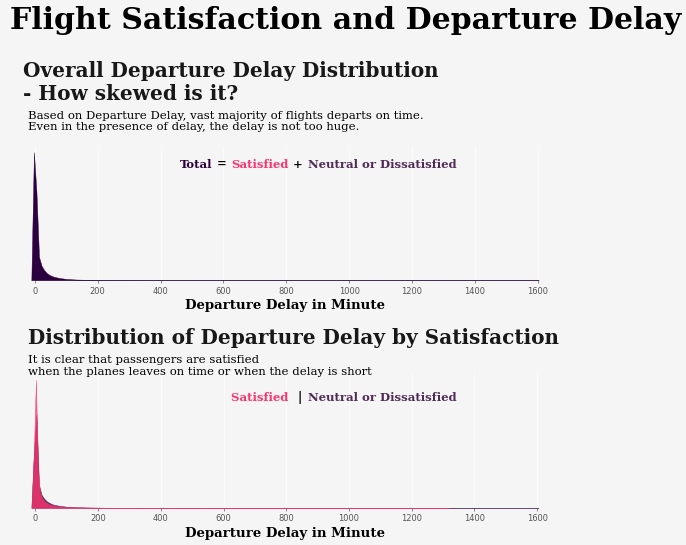

In [8]:
# Departure Delay and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable 

sns.kdeplot(data = data, x = 'Departure Delay', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Departure Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-36,0.072,'Overall Departure Delay Distribution\n- How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-23,0.06, 'Based on Departure Delay, vast majority of flights departs on time. \nEven in the presence of delay, the delay is not too huge.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(460,0.045, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(580,0.045, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(625,0.045, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(820,0.045, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(870,0.045, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = data[data['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Departure Delay',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = data[data['Satisfaction'] == "Satisfied"], x = 'Departure Delay',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Departure Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-23,0.087,'Distribution of Departure Delay by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-23,0.071,'It is clear that passengers are satisfied \nwhen the planes leaves on time or when the delay is short', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(625,0.057, 'Satisfied ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(835,0.057, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(870,0.057, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.13,1,'Flight Satisfaction and Departure Delay',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:

- Even after removing outliers, the distribution of Departure Delay still looks skewed so log transformation might help making it look more like a normal distribution.
- Most of flights departs on time and even the delay is not too huge. i.e. delay over 20 minutes is rare.
- Satisfied feedback from passengers can be observed even when the delay is over an hour.

#### Arrival Delay and Satisfaction

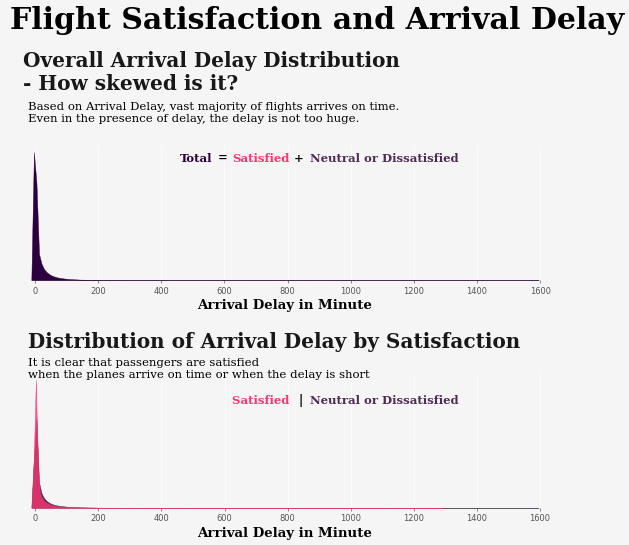

In [9]:
# Departure Delay and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable 

sns.kdeplot(data = data, x = 'Arrival Delay', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Arrival Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-36,0.072,'Overall Arrival Delay Distribution\n- How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-23,0.06, 'Based on Arrival Delay, vast majority of flights arrives on time. \nEven in the presence of delay, the delay is not too huge.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(460,0.045, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(580,0.045, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(625,0.045, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(820,0.045, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(870,0.045, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = data[data['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Arrival Delay',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = data[data['Satisfaction'] == "Satisfied"], x = 'Arrival Delay',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Arrival Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-23,0.087,'Distribution of Arrival Delay by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-23,0.071,'It is clear that passengers are satisfied \nwhen the planes arrive on time or when the delay is short', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(625,0.057, 'Satisfied ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(835,0.057, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(870,0.057, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.13,1,'Flight Satisfaction and Arrival Delay',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:

- Most of flights arrives on time, even when there is delay in arrival, the delay is not too huge.
- Even after removing the outliers, the distribution of `Arrival Delay` looks still skewed so log transformation might help make it look more like a normal distribution.
- Satisfied feedback from passengers can be observed even when the delay is over an hour.

#### Age and Satisfaction

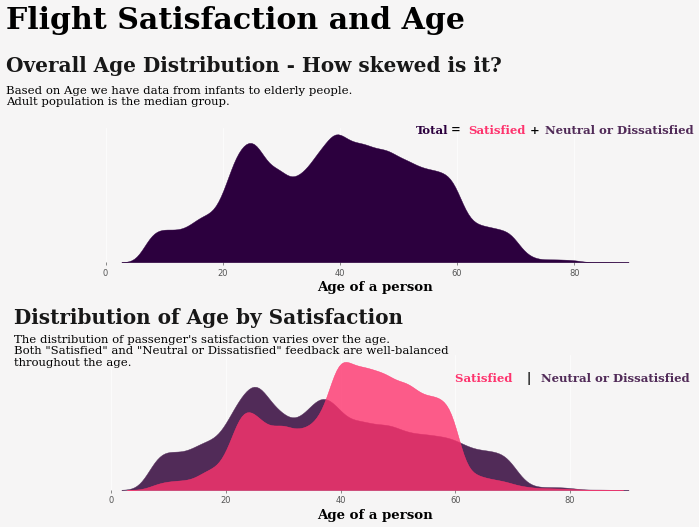

In [10]:
# Age and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable

sns.kdeplot(data = data, x = 'Age', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-17,0.037,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-17,0.0305, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(53,0.025, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(59,0.025, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(62,0.025, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(72.5,0.025, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(75,0.025, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = data[data['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Age',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = data[data['Satisfaction'] == "Satisfied"], x = 'Age',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-17,0.0415,'Distribution of Age by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-17,0.031,'The distribution of passenger\'s satisfaction varies over the age. \nBoth "Satisfied" and "Neutral or Dissatisfied" feedback are well-balanced \nthroughout the age.', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(60,0.027, 'Satisfied ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(72.5,0.027, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(75,0.027, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0,0.97,'Flight Satisfaction and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:
    
- The distribution of age looks almost like a normal distribution, but log transformation would make it look more like a normal distribution.
- Satisfaction was relatively higher in middle-aged passengers.
- Neutral or dissatisfaction was more reported in young people and elderly. 

#### Flight Distance and Satisfaction

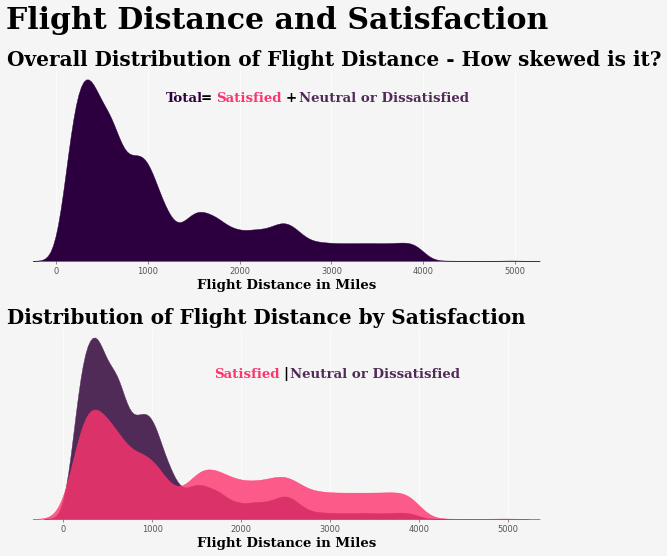

In [11]:
# Flight Distance and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(8,8)
gs.update(wspace = 1, hspace = 0.05, top=0.98)



ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[5:8, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable, to show an overall distribution of a single variable

sns.kdeplot(data = data, x = 'Flight Distance', ax = ax1, shade = True, color = '#2c003e', alpha = 1)
ax1.set_xlabel('Flight Distance in Miles', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })

# adding texts to ax1
ax1.text(1200, 0.00070, 'Total', {'font':'Serif', 'size': 16,'color': '#2c003e','weight':'bold'})
ax1.text(1580, 0.00070,  '=', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax1.text(1750, 0.00070, 'Satisfied', fontdict={'font':'Serif', 'color':'black', 'size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(2500, 0.00070,  '+', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax1.text(2650, 0.00070,  'Neutral or Dissatisfied', fontdict={'font':'Serif', 'color':'black', 'size': 16,'weight':'bold','style':'normal', 'color':'#512b58'})


# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = data[data['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Flight Distance',ax = ax2, shade = True,  alpha = 1, color = '#512b58')
sns.kdeplot(data = data[data['Satisfaction'] == "Satisfied"], x = 'Flight Distance',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Flight Distance in Miles', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

# adding texts to ax2
ax2.text(1700, 0.00075, 'Satisfied', fontdict={'font':'Serif', 'color':'black', 'size':16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(2470, 0.00075,  '|', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax2.text(2550, 0.00075,  'Neutral or Dissatisfied', fontdict={'font':'Serif', 'color':'black', 'size':16,'weight':'bold','style':'normal', 'color':'#512b58'})

# Set titles for both plots
ax1.set_title('Overall Distribution of Flight Distance - How skewed is it?', fontdict = {'font':'Serif', 'color': 'black', 'size': 24,'weight':'bold' }, loc ='left')
ax2.set_title('Distribution of Flight Distance by Satisfaction', fontdict = {'font':'Serif', 'color': 'black', 'size': 24,'weight':'bold' },loc='left')



fig.suptitle('Flight Distance and Satisfaction', fontsize=36, fontweight='bold', fontfamily='serif')


fig.show()

We can notice the following:

- Even after removing the outliers, the distribution of flight distance looks still skewed.
- The number of neutral or dissatisfied passengers outnumbered that of satisfactory responses.
- Satisfied feedback is more prevalent in long flight.

### Relationship between Departure Delay and Arrival Delay

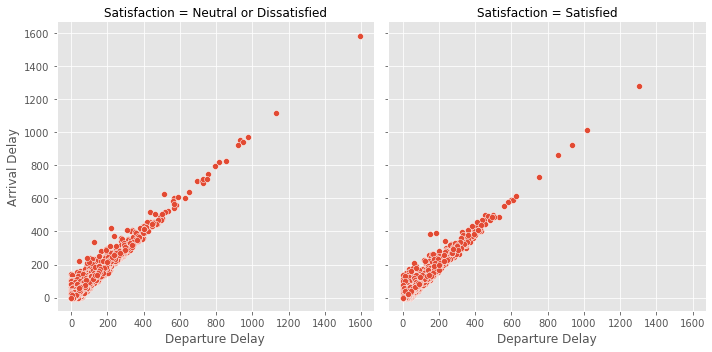

In [12]:
sns.relplot(x="Departure Delay",y='Arrival Delay',data=data,col="Satisfaction",col_wrap=2, palette="husl")

We can identify that there is a linear relationship between `Departure Delay` and `Arrival Delay`. 

### Visualisation of ordinal features

There are 14 ordinal features in the dataset.

In [13]:
# a list of ordinal feature columns
ordinal_cols = ['Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [14]:
# create a function that creates count plots of ordinal variables

def plot_countplot_ordinal(data, ordinal_cols):
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}

    plt.figure(figsize=(20, 18))
    plt.suptitle('Count plot of ordinal features', fontsize=26, font='Serif', y=1)

    for i in range(len(ordinal_cols)):
        ax = plt.subplot(4, 4, i+1)
        sns.countplot(data=data, x=data[ordinal_cols[i]], palette=['#512b58', '#fe346e'], hue=data['Satisfaction'], ax=ax)
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)
        ax.set_ylabel('Count', fontdict=font)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(ordinal_cols[i].title(), color='#2c003e', font='Serif', size=14)
        ax.legend(loc='best')
        for tick in ax.get_yticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(12)

    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.tight_layout()
    plt.show()



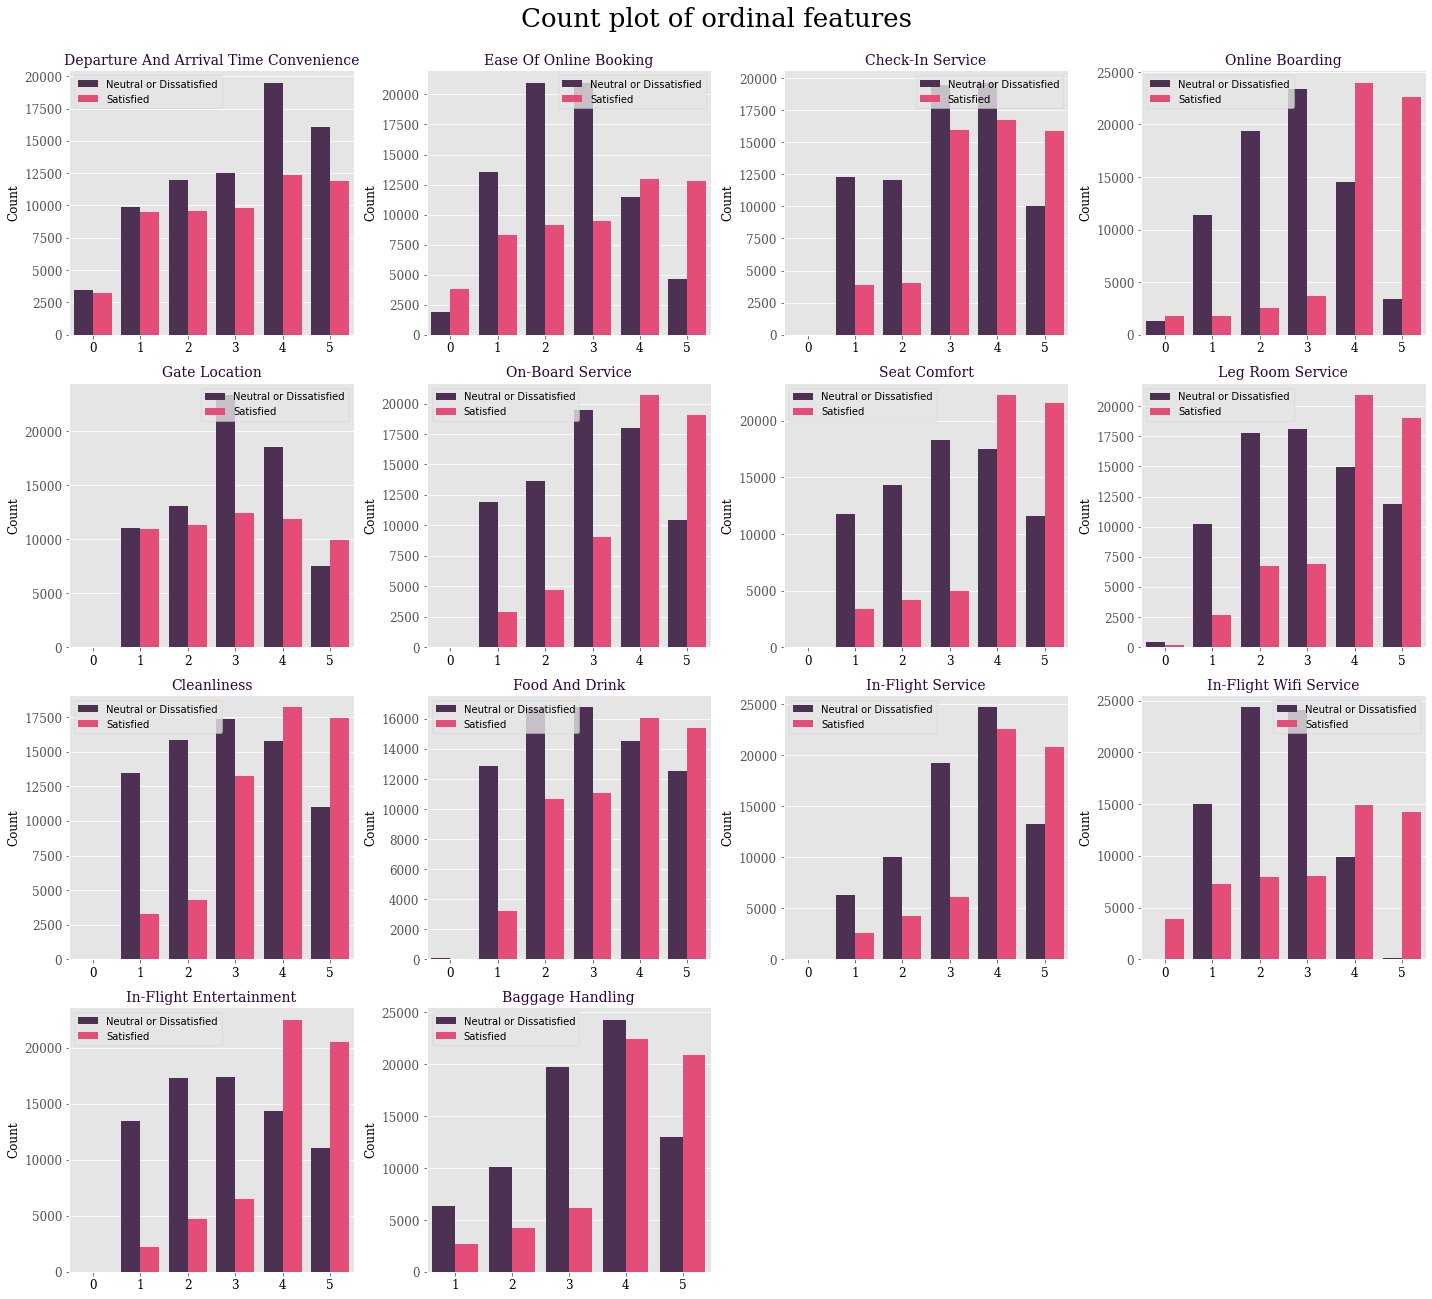

In [15]:
# See distribution of ordinal columns with respect to satisfaction
plot_countplot_ordinal(data, ordinal_cols)

We can find the following from the ordinal variables:

- Neutral or Dissatisfied response was prevalent throughout the service-related columns. e.g. Check-in Service, On-board Service, and In-flight Service.
- When the score was less than 3, neutral or dissatisfied responses out-numbered satisfactory feedback
- When the score was more than 4, positive feedback was more prevalent than negative feedback except a few columns, such as "Departure and Arrival Time Convenience", "Check-in Service" and "Gate location".
- The value of 0 meaning "not applicable" in a few columns should be handled as it is not a valid score.

### Categorical Variable

There are five categorical variables including target variable in the dataset. However, given the distribution of target variable is important, it will be covered seperately. Thus, the distribution of four categorical variables in relation to target variable will be studied in this part. 

In [16]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [17]:
# create a function that creates count plots of categorical variables
def create_count_plots(data, cols, target_col, palette=['#512b58', '#fe346e']):
    '''
    Create count plots for each column in the dataframe
    
    Parameters:
    data (pd.DataFrame): dataframe containing the data
    cols (list): list of column names to be plotted
    target_col (str): name of the target column
    palette (list): list of colors to be used for plotting
    
    Returns:
    None
    '''
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
    
    plt.figure(figsize=(20, 18))
    plt.suptitle('Count plot of categorical features', fontsize = 26, font = 'Serif', y=1)
    for i in range(len(cols)):
        ax = plt.subplot(4,4,i+1)
        sns.countplot(data=data, x=data[cols[i]], palette=palette, hue=data[target_col], ax=ax)
        ax.set_xlabel('')
        plt.subplots_adjust(hspace=0.6, wspace=0.3)
        plt.title(cols[i].title(), color='#2c003e', font='Serif', size=14)
        ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)
        ax.set_ylabel('Count', fontdict=font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=font)

    plt.tight_layout()


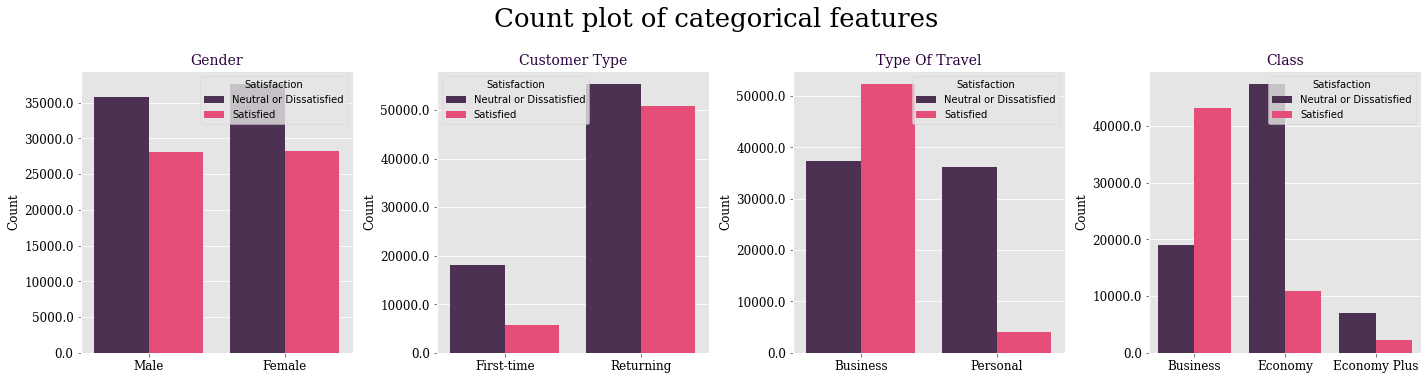

In [18]:
# See distribution of ordinal columns with respect to satisfaction
create_count_plots(data, categorical_cols, 'Satisfaction', ['#512b58', '#fe346e'])

We can notice the following:

- The number of "Neutral or Dissatisfied" passengers were more than that of "Satisfied" passengers, regardless of gender.
- Many passengers were not a first-time user.
- The vast majority of personal travelers was neutral or dissatisfied.  
- Passengers on business class were more satisfied than passengers of other class. Economy class passengers were highly not satisfied.

### Distribution of Target

Distribution of our target variable is important with regards to building a prediction model. Highly unbalanced distribution of target variable results in a poor model prediction. In the presence of unbalanced target variable, we need to do undersampling or oversampling.

https://dl.acm.org/doi/abs/10.1145/2907070?casa_token=bAwKtxQ4Zp8AAAAA:MtqBkbexPLkk3LIgbXv3svw4y2IDXC-sZeADzxw6iVjlkj50iMsI49u7LPwrL2CqLe81W8rmJAA

In [19]:
# count target variable
x = pd.DataFrame( data.groupby(['Satisfaction'])['Satisfaction'].count())
x

,Satisfaction
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


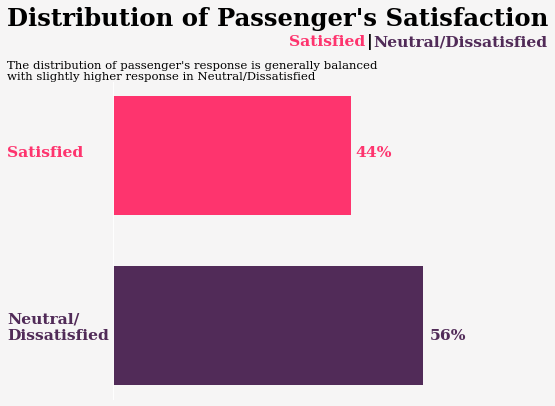

In [20]:
# visualise distribution of target variable
x = pd.DataFrame( data.groupby(['Satisfaction'])['Satisfaction'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.Satisfaction[1], height = 0.7, color = '#fe346e')
plt.text(-25150,-0.08, 'Neutral/\nDissatisfied',{'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#512b58'})
plt.text(75000,-0.08, '56%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#512b58'})
ax.barh([0], x.Satisfaction[0], height = 0.7, color = '#512b58')
plt.text(-25150,1, 'Satisfied', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#fe346e'})
plt.text(57500,1, '44%',{'font':'Serif', 'weight':'bold','size':'16','color':'#fe346e'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-25150,1.77, 'Distribution of Passenger\'s Satisfaction' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
plt.text(41650,1.65, 'Satisfied', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
plt.text(60050,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(61750,1.65, 'Neutral/Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
plt.text(-25150,1.45, 'The distribution of passenger\'s response is generally balanced \nwith slightly higher response in Neutral/Dissatisfied', 
        {'font':'Serif', 'size':'12','color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can notice the following:

- The distribution of passenger's response is generally well-balanced. 
- "Neutral or Dissatisfied" feedback was slightly higher than the positive response. Yet, the distribution is quasi-equally balanced so we do not need resampling.

## Data preprocessing

### Handling missing values

Missing values will be replaced by median values as it is robust to outliers.

In [21]:
# check number of missing values in the data

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay,393,0.0030
Gender,0,0.0000
Gate Location,0,0.0000
Baggage Handling,0,0.0000
In-flight Entertainment,0,0.0000


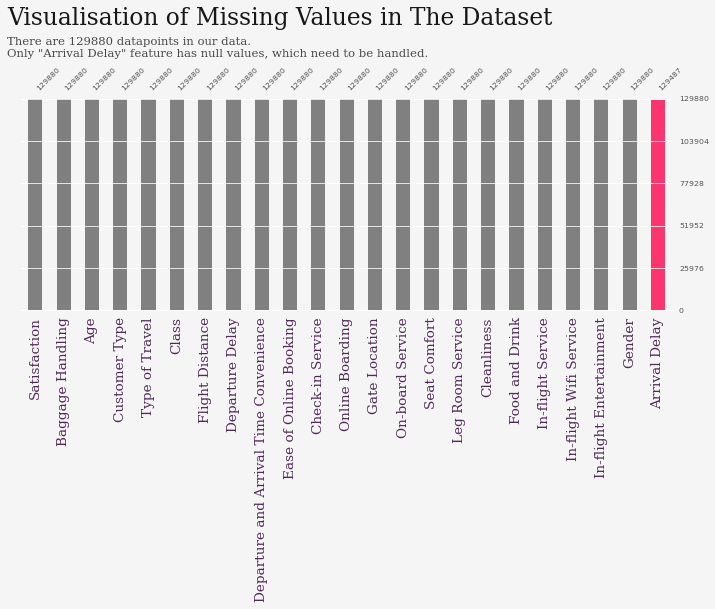

In [22]:
# Visualisation of missing values

# color scheme
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
        'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey', '#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# displaying bar graphs in a descending order
msno.bar(data, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualisation of Missing Values in The Dataset',{'font': 'Serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'There are 129880 datapoints in our data.\nOnly "Arrival Delay" feature has null values, which need to be handled.',{'font': 'Serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

In [23]:
# replacing missing values with median values
data['Arrival Delay'] = data['Arrival Delay'].fillna(round (data['Arrival Delay'].median(), 2))
data.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    


We can see now that there are no missing values in our datasets.

### Handling the value of 0 in ordinal features
The value of 0 in ordinal feature columns might affect the interpretation of standardised data. Thus, it seems more reasonable to exclude the value of 0 before standardising the columns to get a more accurate representation of the data.

In [24]:
# dropping rows which has the value of 0
data = data[(data[['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Online Boarding',
            'Leg Room Service', 'In-flight Wifi Service']] != 0).all(axis=1)]

### Data type conversion

The below procedure converts the data type as well as can reduce the memory usage.

In [25]:
data['Arrival Delay'] = data['Arrival Delay'].astype('int64')

categorical_colnames =  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
for i in categorical_colnames:
    data[i] = data[i].astype('category')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119577 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  119577 non-null  category
 1   Age                                     119577 non-null  int64   
 2   Customer Type                           119577 non-null  category
 3   Type of Travel                          119577 non-null  category
 4   Class                                   119577 non-null  category
 5   Flight Distance                         119577 non-null  int64   
 6   Departure Delay                         119577 non-null  int64   
 7   Arrival Delay                           119577 non-null  int64   
 8   Departure and Arrival Time Convenience  119577 non-null  int64   
 9   Ease of Online Booking                  119577 non-null  int64   
 10  Check-in Service                

### Outliers

The existence of outliers might affect a model's performance so they will be removed by using z-scores.

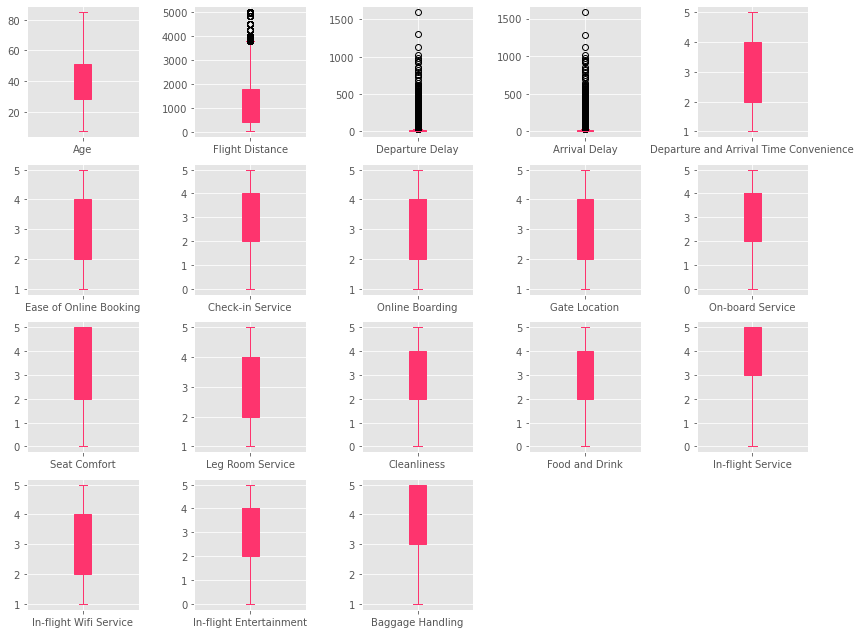

In [27]:
# Boxplots of features

numeric_data=data.select_dtypes(exclude=["object"])
numeric_data.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (14,14),patch_artist=True,color=colors[1])
plt.subplots_adjust(wspace = 0.5)

We can identify potential outliers in some columns. The outliers in columns of "Flight Distance","Departure Delay" and "Arrival Delay" are noticeable and these will be dropped by using z-score.

In [28]:
# create a function that filters outliers by using z-score

def filter_outliers_zscore(data, columns, std=3):
    zscore_df = data[columns].copy()
    for col in columns:
        zscore_df[col] = np.abs((data[col] - data[col].mean()) / data[col].std())
    
    print('Shape of Dataset before removing outliers: {}'.format(data.shape))
    
    outliers = data[(zscore_df > std).any(axis=1)]
    df = data.drop(index=outliers.index).reset_index(drop=True)

    print('')
    print('Removing outliers....')
    print('Number of outliers that will be dropped are: {}'.format(outliers.shape[0]))
    print('Shape of dataset after removing outliers: {}'.format(df.shape))

    return df, zscore_df

In [29]:
# get outlier-filtered data and z-score dataframe
columns = ["Flight Distance", "Departure Delay", "Arrival Delay"] # columns to use for filtering outliers
df, zscore_df = filter_outliers_zscore(data, columns)

Shape of Dataset before removing outliers: (119577, 23)

Removing outliers....
Number of outliers that will be dropped are: 2894
Shape of dataset after removing outliers: (116683, 23)


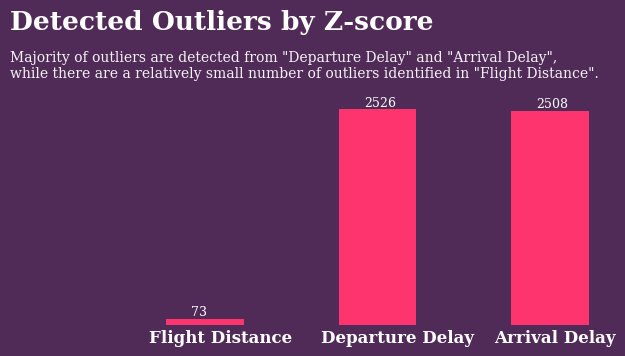

In [30]:
# visualise the number of outliers in the datasets
temp = zscore_df.copy()


# if x is bigger than 3, it will be considered as an outlier and written as 0
for col in temp.columns:
    temp[col] = temp[col].apply( lambda x: np.nan if x > 3  else x )

# outliers will be counted
nullvalues = temp.isnull().sum()

# plotting outliers in each column
fig, ax = plt.subplots(figsize = (6,3), dpi = 100)
fig.patch.set_facecolor(colors[2])
ax.set_facecolor(colors[2])

for loc in  ['left','right', 'bottom', 'top']:
    ax.spines[loc].set_visible(False)
    
ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)

# height of a bar is the number of outliers
ax.bar(x = nullvalues.index , height = nullvalues.values, width = 0.45, color = colors[1])

# labelling setting
for idx,pa in enumerate(ax.patches):
    ax.text(pa.get_x() + pa.get_width()/10 +0.1 , pa.get_height() + 35, pa.get_height() ,{'font':'serif', 'size':9, 'weight':'normal', 'color':'white'}, alpha = 1)
    ax.text(pa.get_x() -0.1 , -200, nullvalues.index[idx],{'font':'serif', 'size':12, 'weight':'bold', 'color':'white'}, alpha = 1)
    

fig.text(-0.1,1.11,'Detected Outliers by Z-score ', {'font':'serif', 'size':19, 'weight':'bold','color':'white'})
fig.text(-0.1,0.95,'Majority of outliers are detected from "Departure Delay" and "Arrival Delay",\nwhile there are a relatively small number of outliers identified in "Flight Distance".', {'font':'serif', 'size':10, 'weight':'normal','color':'white'}, alpha = 0.95)

ax.set_xticks(ticks = '')


fig.show()

We can notice the following:

- The majority of outliers are spotted in `Departure Delay` and `Arrival Delay`.
- There is a discrepancy between the dropped number of outliers and the sum of outliers in the Figure. As explored before, this is due to colinearity between `Departure Delay` and `Arrival Delay`. For instance, if there is a huge `Departure Delay`, it is likely to result in a huge `Arrival Delay`.

### Filtering business travelers

In [31]:
new_df = df[df['Type of Travel'] == 'Business']
len(new_df)

80648

#### Departure Delay and Satisfaction

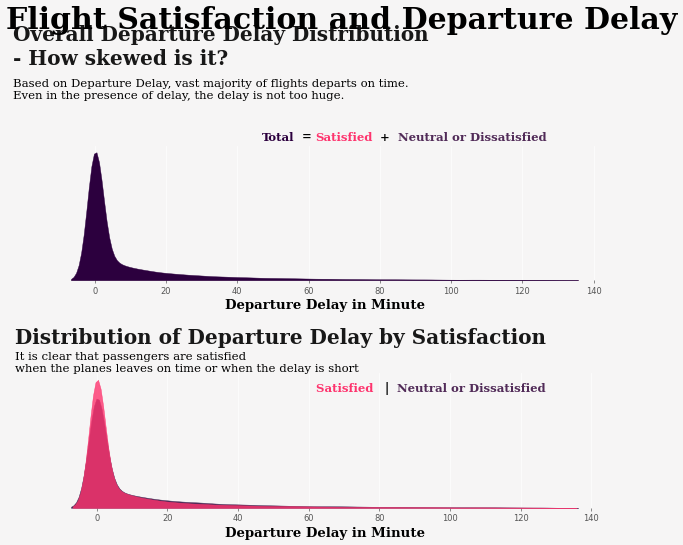

In [32]:
# Departure Delay and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable 

sns.kdeplot(data = new_df, x = 'Departure Delay', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Departure Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-23,0.189,'Overall Departure Delay Distribution\n- How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-23,0.159, 'Based on Departure Delay, vast majority of flights departs on time. \nEven in the presence of delay, the delay is not too huge.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(47,0.122, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(58,0.122, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(62,0.122, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(80,0.122, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(85,0.122, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = df[df['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Departure Delay',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['Satisfaction'] == "Satisfied"], x = 'Departure Delay',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Departure Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-23,0.151,'Distribution of Departure Delay by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-23,0.125,'It is clear that passengers are satisfied \nwhen the planes leaves on time or when the delay is short', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(62,0.107, 'Satisfied ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(81.5,0.107, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(85,0.107, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.07,1,'Flight Satisfaction and Departure Delay',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:

- Even after removing outliers, the distribution of Departure Delay still looks skewed so log transformation might help making it look more like a normal distribution.
- Most of flights departs on time and even the delay is not too huge. i.e. delay over 20 minutes is rare.
- Satisfied feedback from passengers can be observed even when the delay is over an hour.

#### Arrival Delay and Satisfaction

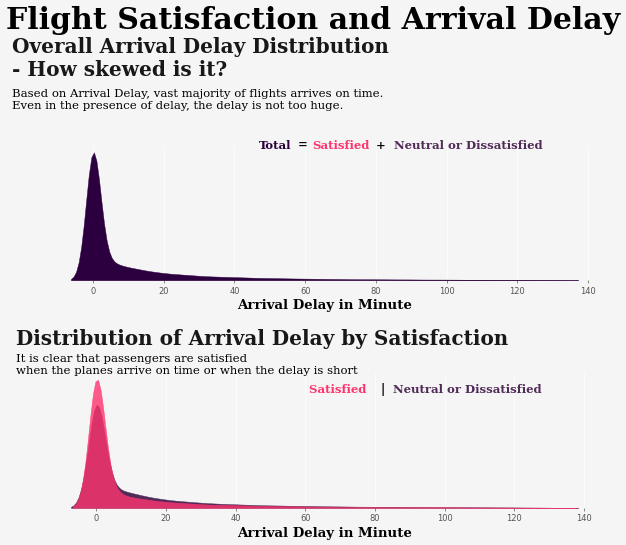

In [33]:
# Arrival Delay and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable

sns.kdeplot(data = df, x = 'Arrival Delay', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Arrival Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-23,0.189,'Overall Arrival Delay Distribution\n- How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-23,0.159, 'Based on Arrival Delay, vast majority of flights arrives on time. \nEven in the presence of delay, the delay is not too huge.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(47,0.122, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(58,0.122, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(62,0.122, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(80,0.122, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(85,0.122, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = df[df['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Arrival Delay',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['Satisfaction'] == "Satisfied"], x = 'Arrival Delay',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Arrival Delay in Minute', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-23,0.151,'Distribution of Arrival Delay by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-23,0.124,'It is clear that passengers are satisfied \nwhen the planes arrive on time or when the delay is short', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(61,0.107, 'Satisfied ', {'font': 'Serif','weight':'bold','size': 14,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(81.5,0.107, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(85,0.107, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.07,1,'Flight Satisfaction and Arrival Delay',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:

- Most of flights arrives on time, even when there is delay in arrival, the delay is not too huge.
- Even after removing the outliers, the distribution of `Arrival Delay` looks still skewed so log transformation might help make it look more like a normal distribution.
- Satisfied feedback from passengers can be observed even when the delay is over an hour.

#### Age and Satisfaction

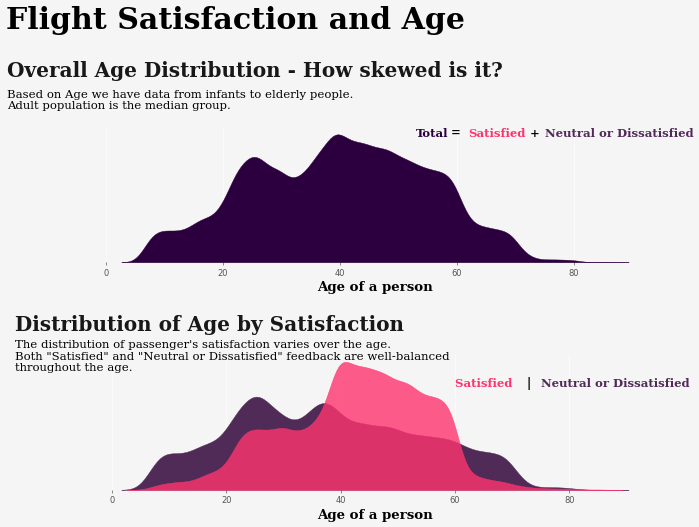

In [34]:
# Age and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(10,8)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable, to show an overall distribution of a single variable

sns.kdeplot(data = df, x = 'Age', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(-17,0.037,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax1.text(-17,0.0305, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'14','color': 'black'})
ax1.text(53,0.025, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(59,0.025, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(62,0.025, 'Satisfied',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(72.5,0.025, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(75,0.025, 'Neutral or Dissatisfied',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = df[df['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Age',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['Satisfaction'] == "Satisfied"], x = 'Age',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(-17,0.0415,'Distribution of Age by Satisfaction', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax2.text(-17,0.031,'The distribution of passenger\'s satisfaction varies over the age. \nBoth "Satisfied" and "Neutral or Dissatisfied" feedback are well-balanced \nthroughout the age.', {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(60,0.027, 'Satisfied ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(72.5,0.027, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax2.text(75,0.027, 'Neutral or Dissatisfied', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0,0.97,'Flight Satisfaction and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':36})
fig.show()

We can notice the following:
    
- The distribution of age looks almost like a normal distribution, but log transformation would make it look more like a normal distribution.
- Satisfaction was relatively higher in middle-aged passengers.
- Neutral or dissatisfaction was more reported in young people and elderly. 

#### Flight Distance and Satisfaction

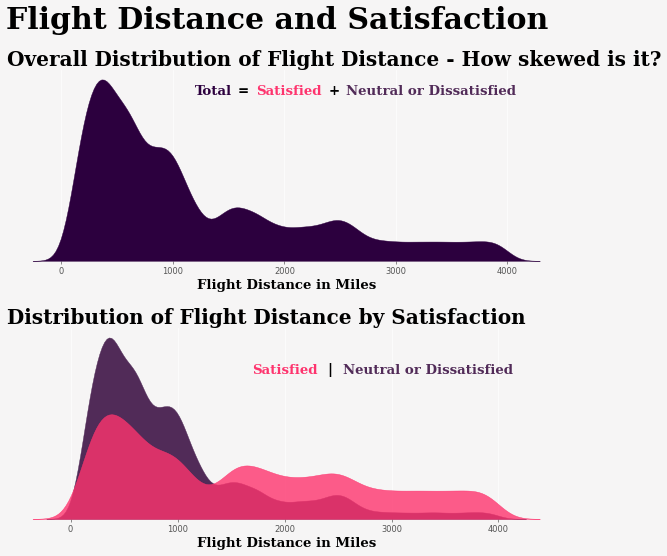

In [35]:
# Flight Distance and Satisfaction
fig = plt.figure(figsize = (12,10), dpi = 60)

gs = fig.add_gridspec(8,8)
gs.update(wspace = 1, hspace = 0.05, top=0.98)



ax1 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax2 = fig.add_subplot(gs[5:8, 0:8]) #hue distribution plot


# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable, to show an overall distribution of a single variable

sns.kdeplot(data = df, x = 'Flight Distance', ax = ax1, shade = True, color = '#2c003e', alpha = 1)
ax1.set_xlabel('Flight Distance in Miles', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })

# adding texts to ax1
ax1.text(1200, 0.00070, 'Total', {'font':'Serif', 'size': 16,'color': '#2c003e','weight':'bold'})
ax1.text(1580, 0.00070,  '=', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax1.text(1750, 0.00070, 'Satisfied', fontdict={'font':'Serif', 'color':'black', 'size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(2400, 0.00070,  '+', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax1.text(2550, 0.00070,  'Neutral or Dissatisfied', fontdict={'font':'Serif', 'color':'black', 'size': 16,'weight':'bold','style':'normal', 'color':'#512b58'})


# distribution plots with hue of satisfaction, to show the distribution of a variable with regards to target variable


sns.kdeplot(data = df[df['Satisfaction'] == "Neutral or Dissatisfied"], x = 'Flight Distance',ax = ax2, shade = True,  alpha = 1, color = '#512b58')
sns.kdeplot(data = df[df['Satisfaction'] == "Satisfied"], x = 'Flight Distance',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Flight Distance in Miles', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

# adding texts to ax2
ax2.text(1700, 0.00075, 'Satisfied', fontdict={'font':'Serif', 'color':'black', 'size':16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(2400, 0.00075,  '|', {'color':'black' , 'size': 16, 'weight': 'bold'})
ax2.text(2550, 0.00075,  'Neutral or Dissatisfied', fontdict={'font':'Serif', 'color':'black', 'size':16,'weight':'bold','style':'normal', 'color':'#512b58'})

# Set titles for both plots
ax1.set_title('Overall Distribution of Flight Distance - How skewed is it?', fontdict = {'font':'Serif', 'color': 'black', 'size': 24,'weight':'bold' }, loc ='left')
ax2.set_title('Distribution of Flight Distance by Satisfaction', fontdict = {'font':'Serif', 'color': 'black', 'size': 24,'weight':'bold' },loc='left')



fig.suptitle('Flight Distance and Satisfaction', fontsize=36, fontweight='bold', fontfamily='serif')


fig.show()

We can notice the following:

- Even after removing the outliers, the distribution of flight distance looks still skewed.
- The number of neutral or dissatisfied passengers outnumbered that of satisfactory responses.
- Satisfied feedback is more prevalent in long flight.

### Visualisation of correlation between various features

Before making a correlation map, the following procedures will be conducted. Firstly, log transformation will be applied to numerical features to reduce the skewness in the distribution. Secondly, categorical features will be encoded by using LabelEncoder, and then all features will be normalised by using MinMaxScaler. This scaler scales the data to a specified range (usually 0 to 1), which is suitable for data that is not normally distributed and has outliers.

#### Log transformation

In [36]:
# log transformation of skewed numerical features  
df_copy = new_df.copy()

df_copy['Age'] = df_copy['Age'].apply(lambda x: np.log(x))
df_copy['Flight Distance'] = df_copy['Flight Distance'].apply(lambda x: np.log(x))
df_copy['Departure Delay'] = df_copy['Departure Delay'].apply(lambda x: np.log(x))
df_copy['Arrival Delay'] = df_copy['Arrival Delay'].apply(lambda x: np.log(x))

#### Encoding and normalisation of data

In [37]:
# preprocessing - label enconding and numerical value scaling
le = LabelEncoder()
mm = MinMaxScaler()

## label encoding of categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])
    
cols = df_copy.columns

## normalising features with MinMaxScaler
df_copy[cols] = mm.fit_transform(df_copy[cols])

#### Correlation map

The correlation map provides a numerical representation of the correlations between variables, which are displayed as correlation coefficients. This can help you identify which features have a strong linear relationship with the target variable and which ones do not. However, it is important to keep in mind that correlation does not imply causation.

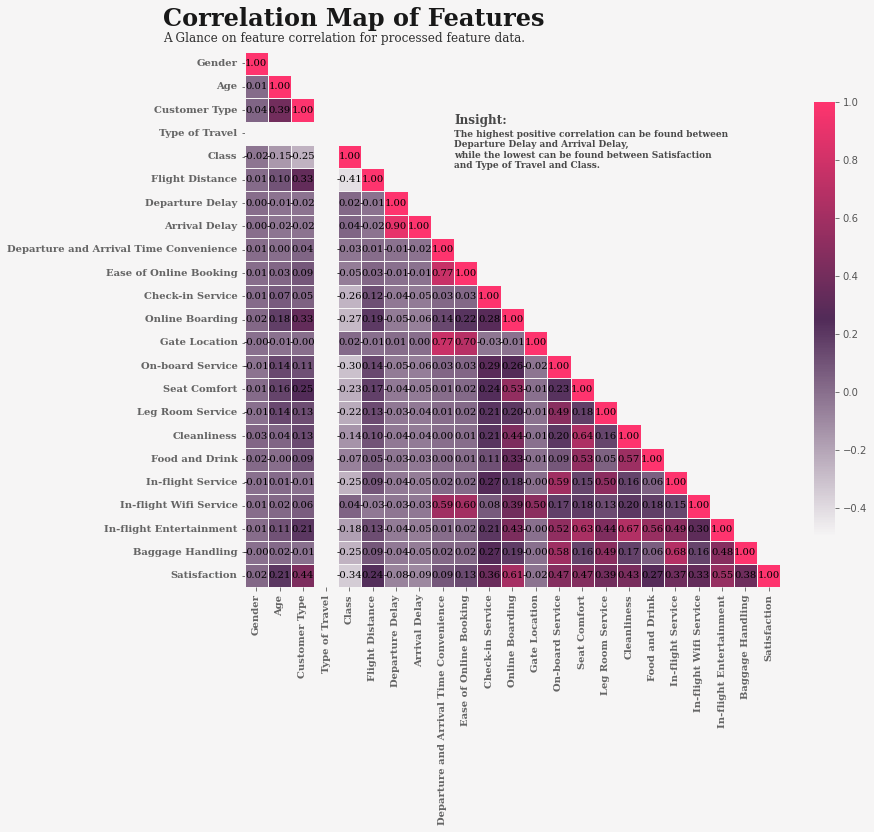

In [38]:
# correlation map for all the features

df_corr = df_copy.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask[np.diag_indices_from(mask)] = False

fig, ax = plt.subplots(figsize = (12,16))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# plot heatmap
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f",cmap = colormap,
           vmin=-0.5, vmax=1.0, cbar_kws={"shrink": .5, }, ax = ax, cbar = True,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':10, 'color':'black'} )



# yticks
ax.tick_params(axis = 'y', rotation=0)
xticks = ['Gender', 'Age','Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience',
          'Ease of Online Booking','Check-in Service','Online Boarding','Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
         'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']
yticks = ['Gender', 'Age','Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience',
          'Ease of Online Booking','Check-in Service','Online Boarding','Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
         'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

ax.set_xticklabels(xticks, fontdict={'font': 'Serif', 'size': 10, 'weight': 'bold'}, rotation=90, alpha=0.9)
ax.set_yticklabels(yticks, fontdict={'font': 'Serif', 'size': 10, 'weight': 'bold'}, rotation=0, alpha=0.9)

ax.text(-3.5,-1.1, 'Correlation Map of Features',{'font':'serif', 'size': 24, 'weight':'bold'}, alpha = 0.9)
ax.text(-3.5,-0.405, 'A Glance on feature correlation for processed feature data.',{'font':'serif', 'size': 12, 'weight':'normal'}, alpha = 0.8)

ax.text(9,5, 'The highest positive correlation can be found between \nDeparture Delay and Arrival Delay,\nwhile the lowest can be found between Satisfaction \nand Type of Travel and Class.',{'font':'serif', 'size': 9, 'weight':'bold'},alpha = 0.7)
ax.text(9,3.1, 'Insight:',{'font':'serif', 'size': 12, 'weight':'bold'},alpha = 0.7)


fig.show()

In [39]:
# Calculate the correlation coefficients with respect to 'Satisfaction'
corr_coef = round(abs(df_corr['Satisfaction'] * 100).sort_values(ascending=False), 2)
corr_coef

Satisfaction                                                             100.0000
Online Boarding                                                           61.4500
In-flight Entertainment                                                   54.8400
On-board Service                                                          47.3100
Seat Comfort                                                              46.5100
Customer Type                                                             44.2200
Cleanliness                                                               42.5400
Leg Room Service                                                          38.8400
Baggage Handling                                                          37.8100
In-flight Service                                                         37.3400
Check-in Service                                                          36.1100
Class                                                                     34.2200
In-flight Wifi S

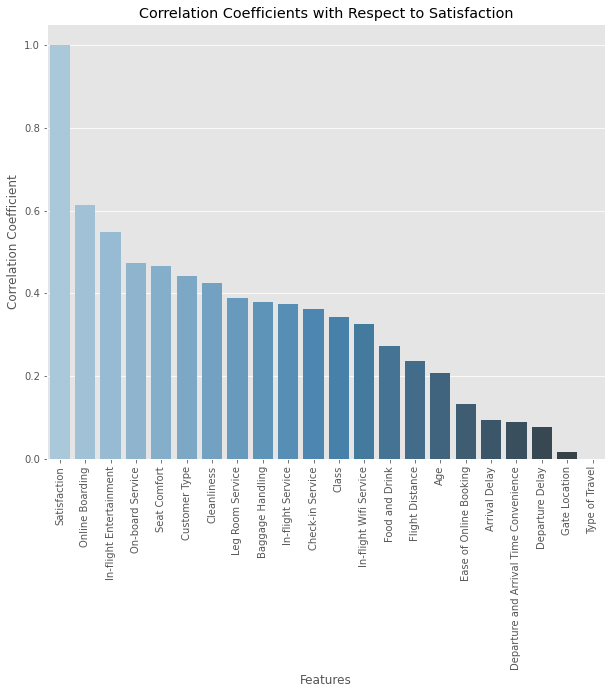

In [40]:
# draw correlation coefficient regarding Satisfaction
plt.figure(figsize=(10, 8))
corr = abs(df_corr['Satisfaction'][1:]).sort_values(ascending=False)
sns.barplot(x=corr.index, y=corr, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Respect to Satisfaction')
plt.show()



These coefficients indicate how closely related each feature is to the target variable `Satisfaction`. This is useful when building a machine learning model because it helps to identify which features are most strongly related to the target variable. Therefore, it can help us decide which features to include or exclude from the model, or whether we need to engineer new features that may improve the model's performance.

We can see that the column with the strongest correlation with 'Satisfaction' is 'Online Boarding' with a coefficient of 0.5728, followed by 'Type of Travel' and 'Class' with coefficients of 0.4646 and 0.4536, respectively.

In [41]:
# select features with coefficients bigger than 0.2
corr_coef_over_20 = corr_coef[corr_coef > 20]

df_final = df_copy[corr_coef_over_20.index.tolist()]
df_final

,Satisfaction,Online Boarding,In-flight Entertainment,On-board Service,Seat Comfort,Customer Type,Cleanliness,Leg Room Service,Baggage Handling,In-flight Service,Check-in Service,Class,In-flight Wifi Service,Food and Drink,Flight Distance,Age
0,0.0000,0.5000,1.0000,0.6000,1.0000,0.0000,1.0000,0.2500,1.0000,1.0000,0.7500,0.0000,0.5000,1.0000,0.1813,0.5541
1,1.0000,1.0000,1.0000,1.0000,0.7500,1.0000,1.0000,1.0000,1.0000,1.0000,0.5000,0.0000,0.2500,0.6000,0.1813,0.3784
2,1.0000,1.0000,0.6000,0.6000,1.0000,1.0000,1.0000,0.5000,0.5000,0.6000,0.7500,0.0000,0.7500,1.0000,0.1894,0.4595
3,1.0000,0.7500,1.0000,1.0000,1.0000,1.0000,0.8000,1.0000,1.0000,1.0000,0.5000,0.0000,0.2500,0.8000,0.4488,0.5811
4,1.0000,1.0000,0.6000,0.6000,0.7500,1.0000,1.0000,0.7500,0.5000,0.6000,0.5000,0.0000,0.5000,0.8000,0.8606,0.5676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116670,0.0000,0.2500,0.4000,0.2000,0.2500,1.0000,0.4000,0.2500,0.5000,0.6000,0.2500,1.0000,0.2500,0.4000,0.0631,0.7703
116671,0.0000,0.5000,0.8000,0.4000,0.7500,1.0000,0.8000,1.0000,0.5000,0.8000,0.0000,1.0000,0.5000,0.8000,0.0905,0.5405
116672,0.0000,0.2500,0.8000,0.4000,0.7500,0.0000,0.8000,0.7500,0.2500,0.4000,0.2500,0.5000,0.2500,0.8000,0.0905,0.1757
116673,0.0000,0.2500,1.0000,0.4000,1.0000,0.0000,1.0000,0.0000,0.7500,0.8000,0.2500,0.0000,0.2500,1.0000,0.0631,0.2162


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80648 entries, 0 to 116674
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Satisfaction             80648 non-null  float64
 1   Online Boarding          80648 non-null  float64
 2   In-flight Entertainment  80648 non-null  float64
 3   On-board Service         80648 non-null  float64
 4   Seat Comfort             80648 non-null  float64
 5   Customer Type            80648 non-null  float64
 6   Cleanliness              80648 non-null  float64
 7   Leg Room Service         80648 non-null  float64
 8   Baggage Handling         80648 non-null  float64
 9   In-flight Service        80648 non-null  float64
 10  Check-in Service         80648 non-null  float64
 11  Class                    80648 non-null  float64
 12  In-flight Wifi Service   80648 non-null  float64
 13  Food and Drink           80648 non-null  float64
 14  Flight Distance      

By setting a correlation coefficient of 0.2 as a threshold, we may exclude features whose coefficient is less than 0.2 as they can be less informative in predicting the target variable, and excluding them may simplify the model and improve its performance. However, it is important to understand that a low correlation coefficient does not necessarily mean a feature should be excluded from the model, as it may still provide valuable information when combined with other features.

By excluding features with low coefficients, there remain 14 features and 1 label. As it shows, all categorical features have been encoded, and all features have been normalised. However, it's crucial to note that using LabelEncoder may introduce bias in some cases where no such order exists.

### ML prediction models

In [43]:
# separate target variable
X = df_final.drop(['Satisfaction'], axis=1)
y = df_final['Satisfaction']

# Split the data into train and test sets
random_state_split = 42
train_x, test_x, train_y, test_y = train_test_split(X, y,stratify=y, random_state=random_state_split)
print(train_y.value_counts())

1.0000    35214
0.0000    25272
Name: Satisfaction, dtype: int64


In [44]:
# check train target data
train_y

59933                                      0.0000
34837                                      0.0000
24351                                      0.0000
32134                                      0.0000
42457                                      1.0000
                           ...                   
108015                                     1.0000
32799                                      1.0000
100740                                     0.0000
49572                                      1.0000
111856                                     1.0000
Name: Satisfaction, Length: 60486, dtype: float64

In [45]:
regressors = {
    'CART': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'LR': LogisticRegression(),
    'XGB': XGBClassifier()
}


# a dict to store the R2 of training and testing data
dict_results = dict()

# as features have already been encoded/normalised, these preprocessing processes are not included in the pipeline
for name, regressor in regressors.items():
    pipeline = Pipeline(steps = [('regressor', regressor)])
    
    model = pipeline.fit(train_x, train_y)
    
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    
    train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))
    
    
    # predictions = model.predict(test_x)
    dict_results[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y),
                         train_rmse, test_rmse]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_results, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff', 'RMSE_train_data', 'RMSE_test_data'])
df_models

,R2_train_data,R2_test_data,R2_diff,RMSE_train_data,RMSE_test_data
CART,1.0000,0.9480,0.0520,0.0000,0.2281
RF,1.0000,0.9668,0.0331,0.0058,0.1822
KNN,0.9582,0.9438,0.0144,0.2045,0.2372
LR,0.8856,0.8850,0.0006,0.3382,0.3391
XGB,0.9807,0.9669,0.0138,0.1391,0.1820


In [46]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Total run time:  66.90251159667969 seconds


### Feature Importance

In [47]:
# feature importance
#!pip install shap
#import shap